In [1]:
import os
import numpy as np

from re import search
from PIL import Image
import matplotlib.cm as cm
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
# recursively get list of files in input directory
def get_files_list(directory):
    dir_list = os.walk(directory)
    dir_list = [x for x in dir_list if not search('/\.', x[0])]
    
    # initialize empty list to store files names
    file_list = []
    for i in dir_list:
        for n in i[2]:
            file_list.append((str(i[0])+'/'+str(n)).replace('//', '/')) 
        
    return file_list

In [3]:
# get list of files
lst = get_files_list('/home/frolui/pet/map/numbers/')
len(lst)

2084

In [4]:
lst[0:5]

['/home/frolui/pet/map/numbers/19_4_1/normal/0/0_19_4_1_18-27-31.png',
 '/home/frolui/pet/map/numbers/19_4_1/normal/0/0_19_4_1_18-11-43.png',
 '/home/frolui/pet/map/numbers/19_4_1/normal/0/0_19_4_1_18-11-17.png',
 '/home/frolui/pet/map/numbers/19_4_1/normal/0/0_19_4_1_18-24-44.png',
 '/home/frolui/pet/map/numbers/19_4_1/normal/0/0_19_4_1_18-20-37.png']

In [5]:
# count the number of png files for numbers 0-9 per number
def count_per_number(filelist):
    count = [0,0,0,0,0,0,0,0,0,0]
    for i in filelist:
        count[int(i[43])] += 1
        
    return count

In [6]:
print(count_per_number(lst))

[150, 407, 337, 291, 209, 190, 143, 122, 122, 113]


In [7]:
def transform_to_arrays(filelist):
    # create empty arrays with images and labels
    labels = np.empty([0], dtype = int)
    # x - numver of rows in image, y - columns
    x = Image.open(filelist[0]).size[1]
    y = Image.open(filelist[0]).size[0]
    # images is an empty 3d numpy array
    images = np.empty((0,x,y))

    for i in filelist:
        # fill the array of labels
        labels = np.append(labels, int(i[43]))
        # fill the array of images (include RGB --> grayscale transformation)
        images = np.vstack([ images, np.asarray(Image.open(i).convert('L'))[np.newaxis,...] ])
    
    return (labels, images)


In [8]:
# get labels [2084] and images[2084,58,47] numpy arrays
ars = transform_to_arrays(lst)

In [9]:
# get labels[2083]
ars[0][2083]

7

In [10]:
# get images[2083]
ars[1][2083]

array([[ 82.,  82.,  82., ..., 242., 181., 181.],
       [ 82.,  82.,  82., ..., 242., 181., 181.],
       [239., 239., 239., ..., 160.,  90.,  90.],
       ...,
       [247., 247., 247., ..., 254., 251., 251.],
       [247., 247., 247., ..., 254., 251., 251.],
       [249., 249., 249., ..., 252., 229., 229.]])

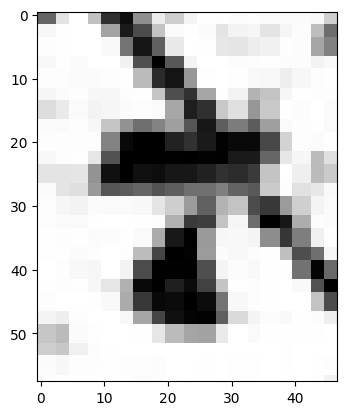

In [13]:
# display numpy array as image
plt.imshow(ars[1][2083], cmap=('Greys_r'))

In [12]:
# save to npy file
np.save('labels.npy',ars[0])
np.save('images.npy',ars[1])